In [24]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

# Funkcje nieliniowe

## Bartosz Kucharz

# Zadanie 1

## Zadana funkcja
$$f(x)=(x-1)e^{-mx} + x^n$$

$$ n=12,m = 14,[-0.7, 1.1]$$


In [2]:
a = -0.7
b = 1.1

n = 12
m = 14

def f(x):
    return (x-1)*np.exp(-m*x) + x**n

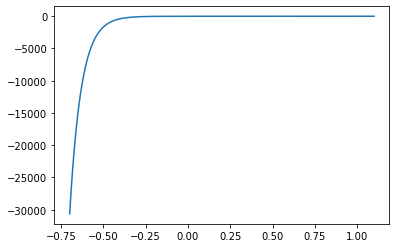

In [3]:
%matplotlib inline
X = np.linspace(a, b, 1000)
Y = f(X)

plt.plot(X, Y)

# Implementacja algorytmów wyznaczania pierwisatków równań nieliniowych

## Kryteria stopu

### $$\left | {x^{(i+1)}-x^{(i)}} \right | < \rho$$

In [4]:
rhos = [1e-3, 1e-5, 1e-9]

In [5]:
def stop_x(rho, x0, x1):
    return np.abs(x1 - x0) < rho
    
def stop_f(rho, x0, x1):
    return np.abs(f(x1)) < rho
    

## Metoda siecznych

In [6]:
def secant(f, x0, x1, epsilon=1e-12, stop=stop_f):
    steps_x, steps_y = [], []
    counter = 0

    while not stop(epsilon, x1, x0):
            x1, x0 = x1 - f(x1)*(x1 - x0)/(f(x1)-f(x0)), x1
            counter += 1
        
    return x1, counter

## Metoda Newtona

In [7]:
def newton_raphson(f, x0, epsilon = 1e-3, stop=stop_f):
    def f_p(x):
        return np.exp(-m*x)*(-x*m + m + 1) + n*x**(n-1)
    
    x = x0
    counter = 0
    last = float('inf')
    
    while not stop(epsilon, x, last):
        last = x

        x = x - f(x)/f_p(x)
        counter+=1
        
    return x, counter


# Wyznaczanie pierwiastka

## Wartość wyznaczona za pomocą silnika WolframAlpha

$$x \approx 0.51574856472875214594 $$

## Metoda siecznych

In [8]:
def test_secant(f, a, b, step, rho_list, stop):
    for rho in rho_list:
        print('-'*53)
        print('Rho =', rho)
        cur_a, cur_b = a, b
        x = PrettyTable()
        x.field_names = ["a", "b", "x0", "iterations"]
        while cur_a < cur_b:
            x0, counter = secant(f, cur_a, cur_b, rho, stop)
            x.add_row([cur_a, cur_b, x0, counter])
            
            if step > 0:
                cur_a = round(cur_a + step, 2)
            else:
                cur_b = round(cur_b + step, 2)
        print(x)
        print()
            
    

### Kryterium stopu
$$\left | {x^{(i+1)}-x^{(i)}} \right | < \rho$$

#### Przy stałym a

In [9]:
test_secant(f, a, b, -0.1, rhos, stop_f)

-----------------------------------------------------
Rho = 0.001
+------+------+---------------------+------------+
|  a   |  b   |          x0         | iterations |
+------+------+---------------------+------------+
| -0.7 | 1.1  |  0.5336936753747028 |     13     |
| -0.7 | 1.0  |  0.5240532041347802 |     12     |
| -0.7 | 0.9  |  0.5277512916266145 |     10     |
| -0.7 | 0.8  |  0.5285261761768484 |     8      |
| -0.7 | 0.7  |  0.5251826090075072 |     6      |
| -0.7 | 0.6  |  0.5332625359501886 |     3      |
| -0.7 | 0.5  |  0.5000000082903581 |     1      |
| -0.7 | 0.4  |  0.4936435812148215 |     3      |
| -0.7 | 0.3  | 0.48724452107392835 |     5      |
| -0.7 | 0.2  |  0.5091702872650163 |     8      |
| -0.7 | 0.1  |  0.5054590306299567 |     10     |
| -0.7 | 0.0  |  0.5013608331192829 |     12     |
| -0.7 | -0.1 |  0.4970608311531688 |     14     |
| -0.7 | -0.2 |  0.4927391730001689 |     16     |
| -0.7 | -0.3 |  0.4886767505327251 |     18     |
| -0.7 | -0.4 | 

#### Przy stałym b

In [10]:
test_secant(f, a, b, 0.1, rhos, stop_x)

-----------------------------------------------------
Rho = 0.001
+------+-----+--------------------+------------+
|  a   |  b  |         x0         | iterations |
+------+-----+--------------------+------------+
| -0.7 | 1.1 | 1.0998157507940247 |     1      |
| -0.6 | 1.1 |  1.09925049224397  |     1      |
| -0.5 | 1.1 | 0.5157517600067583 |     16     |
| -0.4 | 1.1 | 0.5157504933262426 |     16     |
| -0.3 | 1.1 | 0.515748737853972  |     16     |
| -0.2 | 1.1 | 0.5157496293408209 |     14     |
| -0.1 | 1.1 | 0.6040408175805133 |     2      |
| 0.0  | 1.1 | 0.5157800507872031 |     9      |
| 0.1  | 1.1 | 0.5157644871043251 |     11     |
| 0.2  | 1.1 | 0.5157484033428706 |     11     |
| 0.3  | 1.1 | 0.5157478539060875 |     9      |
| 0.4  | 1.1 | 0.4009773780524495 |     2      |
| 0.5  | 1.1 | 0.5000808733427737 |     2      |
| 0.6  | 1.1 | 0.5993367902144682 |     2      |
| 0.7  | 1.1 | 0.515748674525036  |     10     |
| 0.8  | 1.1 | 0.5157487332415227 |     12     |
| 0

### Kryterium stopu
$$\left | f(x^i) \right | < \rho$$

#### Przy stałym a

In [11]:
test_secant(f, a, b, -0.1, rhos, stop_f)

-----------------------------------------------------
Rho = 0.001
+------+------+---------------------+------------+
|  a   |  b   |          x0         | iterations |
+------+------+---------------------+------------+
| -0.7 | 1.1  |  0.5336936753747028 |     13     |
| -0.7 | 1.0  |  0.5240532041347802 |     12     |
| -0.7 | 0.9  |  0.5277512916266145 |     10     |
| -0.7 | 0.8  |  0.5285261761768484 |     8      |
| -0.7 | 0.7  |  0.5251826090075072 |     6      |
| -0.7 | 0.6  |  0.5332625359501886 |     3      |
| -0.7 | 0.5  |  0.5000000082903581 |     1      |
| -0.7 | 0.4  |  0.4936435812148215 |     3      |
| -0.7 | 0.3  | 0.48724452107392835 |     5      |
| -0.7 | 0.2  |  0.5091702872650163 |     8      |
| -0.7 | 0.1  |  0.5054590306299567 |     10     |
| -0.7 | 0.0  |  0.5013608331192829 |     12     |
| -0.7 | -0.1 |  0.4970608311531688 |     14     |
| -0.7 | -0.2 |  0.4927391730001689 |     16     |
| -0.7 | -0.3 |  0.4886767505327251 |     18     |
| -0.7 | -0.4 | 

#### Przy stałym b

In [12]:
test_secant(f, a, b, 0.1, rhos, stop_f)

-----------------------------------------------------
Rho = 0.001
+------+-----+---------------------+------------+
|  a   |  b  |          x0         | iterations |
+------+-----+---------------------+------------+
| -0.7 | 1.1 |  0.5336936753747028 |     13     |
| -0.6 | 1.1 |  0.5335869334378017 |     13     |
| -0.5 | 1.1 |  0.5331542995092017 |     13     |
| -0.4 | 1.1 |  0.5314282354072285 |     13     |
| -0.3 | 1.1 |  0.5251805903668469 |     13     |
| -0.2 | 1.1 |  0.5296019006369954 |     11     |
| -0.1 | 1.1 |  0.5356873245014612 |     4      |
| 0.0  | 1.1 |  0.4975564631089038 |     7      |
| 0.1  | 1.1 |  0.499763641964815  |     9      |
| 0.2  | 1.1 |  0.4957017943749574 |     8      |
| 0.3  | 1.1 | 0.49049381320668517 |     6      |
| 0.4  | 1.1 | 0.49422744262619034 |     4      |
| 0.5  | 1.1 |         1.1         |     0      |
| 0.6  | 1.1 |  0.5329495219457052 |     4      |
| 0.7  | 1.1 |  0.5242659649324006 |     7      |
| 0.8  | 1.1 |  0.5251210756840555

## Metoda Newtona

In [13]:
def test_newton(f, x0, step, rho_list, stop):
    for rho in rho_list:
        print('-'*53)
        print('Rho =', rho)
        cur_x = x0
        x = PrettyTable()
        x.field_names = ["start x", "x0", "iterations"]
        while a <= cur_x <= b:
            cur_x0, counter = newton_raphson(f, cur_x, rho, stop)
            x.add_row([cur_x, cur_x0, counter])
            
            cur_x = round( cur_x + step, 2)
        print(x)
        print()

### Kryterium stopu
$$\left | {x^{(i+1)}-x^{(i)}} \right | < \rho$$

#### Zaczynając od b

In [14]:
test_newton(f, b, -0.1, rhos, stop_x)

-----------------------------------------------------
Rho = 0.001
+---------+--------------------+------------+
| start x |         x0         | iterations |
+---------+--------------------+------------+
|   1.1   | 0.5157486902415126 |     11     |
|   1.0   | 0.5157486104783698 |     10     |
|   0.9   | 0.5157485685528187 |     9      |
|   0.8   | 0.5157513564350305 |     7      |
|   0.7   | 0.5157485795622319 |     6      |
|   0.6   | 0.5157487186028589 |     4      |
|   0.5   | 0.5157489518579742 |     2      |
|   0.4   | 0.5157485952490433 |     4      |
|   0.3   | 0.5157485697737031 |     5      |
|   0.2   | 0.5157486447341296 |     7      |
|   0.1   | 0.5157486425218536 |     8      |
|   0.0   | 0.5157486592590539 |     10     |
|   -0.1  | 0.5157486142209694 |     11     |
|   -0.2  | 0.5157486376273693 |     13     |
|   -0.3  | 0.5157485724569524 |     14     |
|   -0.4  | 0.5157486037648755 |     16     |
|   -0.5  | 0.5157487496753382 |     17     |
|   -0.6  | 0.

#### Zaczynając od a

In [15]:
test_newton(f, a, 0.1, rhos, stop_x)

-----------------------------------------------------
Rho = 0.001
+---------+--------------------+------------+
| start x |         x0         | iterations |
+---------+--------------------+------------+
|   -0.7  | 0.5157489750735402 |     20     |
|   -0.6  | 0.5157485786209821 |     19     |
|   -0.5  | 0.5157487496753382 |     17     |
|   -0.4  | 0.5157486037648755 |     16     |
|   -0.3  | 0.5157485724569524 |     14     |
|   -0.2  | 0.5157486376273693 |     13     |
|   -0.1  | 0.5157486142209694 |     11     |
|   0.0   | 0.5157486592590539 |     10     |
|   0.1   | 0.5157486425218536 |     8      |
|   0.2   | 0.5157486447341296 |     7      |
|   0.3   | 0.5157485697737031 |     5      |
|   0.4   | 0.5157485952490433 |     4      |
|   0.5   | 0.5157489518579742 |     2      |
|   0.6   | 0.5157487186028589 |     4      |
|   0.7   | 0.5157485795622319 |     6      |
|   0.8   | 0.5157513564350305 |     7      |
|   0.9   | 0.5157485685528187 |     9      |
|   1.0   | 0.

### Kryterium stopu
$$\left | f(x^i) \right | < \rho$$

#### Zaczynając od b

In [25]:
test_newton(f, b, -0.1, rhos, stop_f)

-----------------------------------------------------
Rho = 0.001
+---------+--------------------+------------+
| start x |         x0         | iterations |
+---------+--------------------+------------+
|   1.1   | 0.5230821520470125 |     9      |
|   1.0   | 0.5215516862206299 |     8      |
|   0.9   | 0.5189744129513688 |     7      |
|   0.8   | 0.5305130099982345 |     5      |
|   0.7   | 0.5202026016710752 |     4      |
|   0.6   | 0.523434159208395  |     2      |
|   0.5   | 0.5161010660373018 |     1      |
|   0.4   | 0.5093663465654541 |     2      |
|   0.3   | 0.5157889994675341 |     4      |
|   0.2   | 0.5072261093054499 |     5      |
|   0.1   | 0.5155892878309475 |     7      |
|   0.0   | 0.5067627354551995 |     8      |
|   -0.1  | 0.5156215861343247 |     10     |
|   -0.2  | 0.5074701709872498 |     11     |
|   -0.3  | 0.515798602789125  |     13     |
|   -0.4  | 0.508891630232791  |     14     |
|   -0.5  | 0.5159926153511188 |     16     |
|   -0.6  | 0.

#### Zaczynając od a

In [26]:
test_newton(f, a, 0.1, rhos, stop_f)

-----------------------------------------------------
Rho = 0.001
+---------+--------------------+------------+
| start x |         x0         | iterations |
+---------+--------------------+------------+
|   -0.7  | 0.5161114240320801 |     19     |
|   -0.6  | 0.5106420232414604 |     17     |
|   -0.5  | 0.5159926153511188 |     16     |
|   -0.4  | 0.508891630232791  |     14     |
|   -0.3  | 0.515798602789125  |     13     |
|   -0.2  | 0.5074701709872498 |     11     |
|   -0.1  | 0.5156215861343247 |     10     |
|   0.0   | 0.5067627354551995 |     8      |
|   0.1   | 0.5155892878309475 |     7      |
|   0.2   | 0.5072261093054499 |     5      |
|   0.3   | 0.5157889994675341 |     4      |
|   0.4   | 0.5093663465654541 |     2      |
|   0.5   | 0.5161010660373018 |     1      |
|   0.6   | 0.523434159208395  |     2      |
|   0.7   | 0.5202026016710752 |     4      |
|   0.8   | 0.5305130099982345 |     5      |
|   0.9   | 0.5189744129513688 |     7      |
|   1.0   | 0.

# Zadanie 2
Rozwiąż układ równań metodą Newtiona

## Zadany układ równań

$$x_1^2 + x_2^2 + x_3 = 1\newline
  2x_1^2 - x_2^2 - 4x_3^2 = -3\newline
  x_1^2 + x_2 + x_3 = 1\newline$$

In [27]:
def F1(x):
    return x[0]**2 + x[1]**2 + x[2] - 1

def F1_x1(x):
    return 2*x[0]

def F1_x2(x):
    return 2*x[1]

def F1_x3(x):
    return 1



def F2(x):
    return 2*x[0]**2 - x[1]**2 - 4*x[2]**2 + 3

def F2_x1(x):
    return 4*x[0]

def F2_x2(x):
    return -2*x[1]

def F2_x3(x):
    return -8*x[2]



def F3(x):
    return x[0]**2 + x[1] + x[2] -1

def F3_x1(x):
    return 2*x[0]

def F3_x2(x):
    return 1

def F3_x3(x):
    return 1


def F(x):
    return np.array([F1(x), F2(x), F3(x)])

def J(x):
    return np.array([[F1_x1(x), F1_x2(x), F1_x3(x)],
                     [F2_x1(x), F2_x2(x), F2_x3(x)],
                     [F3_x1(x), F3_x2(x), F3_x3(x)]])

### Metoda równań Newtona

In [28]:
def stop_x(rho, x0, x1):
    return np.abs(x1 - x0) < rho
    
def stop_F(rho, x0, x1):
    return np.abs(F(x1)) < rho

In [29]:
def newton(F, x0, epsilon = 1e-3, stop=stop_F):
    x = x0
    counter = 0
    divergent = False
    last= np.empty(3)
    last.fill(10*6)

    while not stop(epsilon, x, last).all():
        last = x
        x = x - np.linalg.inv(J(x)) @ F(x) 
        counter+=1
        if counter > 10000:
            divergent = True
            break
        
    return x, counter, divergent

In [40]:
def test_solving(F, epsilon, stop=stop_F):
    solutions = []
    div = PrettyTable()
    div.field_names = ['Wektory początkowe dla których metoda nie jest zbieżna']
    for _ in range(50):
        x0 = np.array(np.random.normal(size=3))
        x, counter, divergent = newton(F, x0, epsilon, stop)
        if not divergent:
            solutions.append((x, x0))
            div.add_row([x0])
    unique_solutions = []
    table = PrettyTable()
    table.field_names = ['Rozwiązanie', 'Wektor początkowy']
    
    for solution, x0 in solutions:
        temp = unique_solutions
        new = True
        for unique_solution, u_x0 in temp:
            if (np.abs(solution - unique_solution) < epsilon).all():
                new = False
                break
        if new:
            unique_solutions.append((solution, x0))
    
    unique_solutions.sort(key=lambda x: x[0][0])
    for solution, x0 in unique_solutions:
        table.add_row([np.round(solution,5), x0])

    print(table)
    return div

### Kryterium stopu
$$\left | f(x^i) \right | < \rho$$

In [43]:
rest = test_solving(F, 1e-5, stop_F)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779 -0.      -1.39564] | [-0.76238511 -0.20233794 -1.83138492] |
|        [-1.  1. -1.]         | [-0.71957548  0.68463106 -0.60686896] |
| [-0.32304  0.       0.89564] | [-1.87731093 -1.12474311 -0.20606026] |
|  [0.32304 0.      0.89564]   |   [0.67016256 0.10093349 1.71007973]  |
|        [ 1.  1. -1.]         | [ 0.45267599  1.78501596 -0.29032458] |
| [ 1.54779 -0.      -1.39564] | [ 0.59915489 -2.0711804  -0.85502025] |
+------------------------------+---------------------------------------+


In [44]:
rest = test_solving(F, 1e-5, stop_F)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779  0.      -1.39564] | [-0.3340507  -0.01228922 -1.07811543] |
|        [-1.  1. -1.]         | [-0.96288278  2.14522739 -0.63507119] |
| [-0.32304  0.       0.89564] | [-1.25902663 -0.6352942   1.98764629] |
| [ 0.32304 -0.       0.89564] | [ 2.05985123 -1.93608014  2.07527497] |
|        [ 1.  1. -1.]         | [ 0.41210983  1.21219292 -1.56812942] |
| [ 1.54779 -0.      -1.39564] | [ 1.29220053  0.07706622 -0.63191262] |
+------------------------------+---------------------------------------+


In [45]:
rest = test_solving(F, 1e-5, stop_F)
print(rest)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779 -0.      -1.39564] | [-0.55018106 -0.25200834 -0.66229715] |
|        [-1.  1. -1.]         | [-0.46833765  1.15108251 -1.04037309] |
| [-0.32304 -0.       0.89564] | [ 0.03252615 -0.25607117  1.67145238] |
| [ 0.32304 -0.       0.89564] | [ 1.0409982  -1.08070775  0.54070671] |
|        [ 1.  1. -1.]         | [ 1.23706324  0.92571387 -1.16643184] |
| [ 1.54779 -0.      -1.39564] | [ 1.07662514 -1.60720526 -1.74457006] |
+------------------------------+---------------------------------------+
+--------------------------------------------------------+
| Wektory początkowe dla których metoda nie jest zbieżna |
+--------------------------------------------------------+
|         [-0.55018106 -0.25200834 -0.66229715]          |
|         [-0.76109071  0.40408074

### Kryterium stopu
$$\left | {x^{(i+1)}-x^{(i)}} \right | < \rho$$

In [46]:
rest = test_solving(F, 1e-5, stop_x)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779  0.      -1.39564] | [-0.4338453  -0.61019545 -0.84164839] |
|        [-1.  1. -1.]         | [-1.46919058  0.55469841  0.16704534] |
| [-0.32304  0.       0.89564] | [ 0.58423436 -0.7493927  -0.17666176] |
| [ 0.32304 -0.       0.89564] | [ 1.40443192 -1.21977856  1.46405804] |
|        [ 1.  1. -1.]         | [ 0.68459659  0.63462293 -0.63087872] |
| [ 1.54779  0.      -1.39564] | [ 0.76580798 -0.18878367 -0.77704763] |
+------------------------------+---------------------------------------+


In [47]:
rest = test_solving(F, 1e-5, stop_x)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779 -0.      -1.39564] | [-0.49739495  0.31942913 -1.37892026] |
|        [-1.  1. -1.]         | [-1.5658208   0.90559742 -1.15430372] |
| [-0.32304  0.       0.89564] | [-0.45216086 -0.09016138  1.0168858 ] |
|  [0.32304 0.      0.89564]   | [ 0.78390043 -0.27773502  0.07686019] |
|        [ 1.  1. -1.]         | [ 0.00317266  0.80548671 -0.42179195] |
| [ 1.54779  0.      -1.39564] | [ 0.40992184  0.15424314 -1.49420893] |
+------------------------------+---------------------------------------+


In [48]:
rest = test_solving(F, 1e-5, stop_x)
print(rest)

+------------------------------+---------------------------------------+
|         Rozwiązanie          |           Wektor początkowy           |
+------------------------------+---------------------------------------+
| [-1.54779 -0.      -1.39564] | [-0.10170271 -0.21151856 -0.46423031] |
|        [-1.  1. -1.]         | [-0.76176299  1.28382025 -0.69873233] |
| [-0.32304  0.       0.89564] | [-0.09577643 -1.22168286  0.50473022] |
| [ 0.32304 -0.       0.89564] | [ 0.59256274 -0.35883149  0.88268577] |
| [ 1.54779 -0.      -1.39564] | [ 0.23320078 -1.28380089 -0.8521647 ] |
+------------------------------+---------------------------------------+
+--------------------------------------------------------+
| Wektory początkowe dla których metoda nie jest zbieżna |
+--------------------------------------------------------+
|         [ 0.23320078 -1.28380089 -0.8521647 ]          |
|         [-0.10170271 -0.21151856 -0.46423031]          |
|         [-0.09577643 -1.22168286  0.50473022] 

Do wykrycia wszystkich rozwiązań powtórzono metodę 100 krotnie przyjmując za wektory początkowe z wartości z rozkładu normalnego. W wyniku czego otrzymano 6 rozwiazań układu równań.